In [25]:
# 模型评估
from sklearn import metrics
pre = model.predict(X_test)
fpr, tpr, th = metrics.roc_curve(y_test, pre)
metrics.auc(fpr,tpr)

0.7023796266344245

In [24]:
# roc评估方法
acc=cross_val_score(model,data,y,cv=15,scoring="roc_auc")
acc.mean()

0.8652494969932647

In [23]:
#参数调优 k折交叉验证  ,反复评估模型性能，对过拟合也能直到一定作用
from sklearn.model_selection import cross_val_score
acc=cross_val_score(model,data,y,cv=15)
acc
acc.mean()

array([0.84107946, 0.84257871, 0.84257871, 0.85907046, 0.85757121,
       0.86356822, 0.85757121, 0.87856072, 0.89355322, 0.88005997,
       0.89489489, 0.89039039, 0.88888889, 0.86786787, 0.87087087])

0.8686069877973926

In [22]:
feature=X_train.columns
importances=model.feature_importances_
#以2维结构表形式
importances_df=pd.DataFrame()
importances_df["特征名称"]=feature
importances_df["特征重要性"]=importances
importances_df.sort_values("特征重要性",ascending=False)

,特征名称,特征重要性
7,成交意向度,0.923647
3,销售说话时长占比,0.049162
1,对话时长,0.027191
0,对话数量,0.000000
2,互动次数,0.000000
4,销售最长讲述,0.000000
5,客户最长讲述,0.000000
6,对话得分,0.000000


In [20]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred_proba[:,1])
score
data.columns
model.feature_importances_

0.863629292988215

Index(['对话数量', '对话时长', '互动次数', '销售说话时长占比', '销售最长讲述', '客户最长讲述', '对话得分',
       '成交意向度'],
      dtype='object')

array([0.        , 0.02719085, 0.        , 0.04916196, 0.        ,
       0.        , 0.        , 0.92364719])

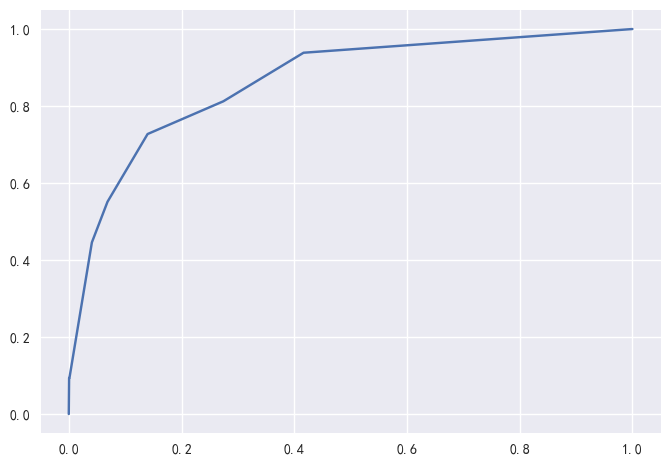

In [19]:
#模型预测效果评估
from sklearn.metrics import roc_curve
#概率
y_pred_proba=model.predict_proba(X_test)
fpr,tpr,th=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr);

In [18]:
#查看整体的预测效果 准确率
model.score(X_test,y_test)

0.8715

In [17]:
y_pred=model.predict(X_test)  # 预测是否成效
print(y_pred[0:100])

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1]


In [16]:
#模型的训练和搭建
from sklearn.tree import DecisionTreeClassifier
#实例化
model=DecisionTreeClassifier(max_depth=3,random_state=123)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [13]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False
data = pd.read_excel('./2_逻辑回归案例/客户列表.xls')
data.rename(columns={'客户ID':'ID', '对话时长(总时长/对话数量)':'对话时长', '互动次数(总次数/对话数量)':'互动次数',
                     '是否已成交(1已成交0未成交)':'是否成交'}, inplace=True)
y = data.pop('是否成交')
data.pop('ID')
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=123)


0            6
1            8
2            9
3           28
4           75
         ...  
9995    177034
9996    177036
9997    177040
9998    177043
9999    177044
Name: ID, Length: 10000, dtype: int64

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"